<img src="igdb.jpeg" alt="drawing" width="150"/>

# IGDB User Rating Prediction

By Lindy Castellaw, Glady Barrios, jarid Jones


October 7, 2022

# Project Goals 

In our project we will use data from a  website (IGDB.com)
our goal is to analyze characteristics that make a game have a high rating
We will also use statistical models to predict how ratings will turn out for future video games.” 
In turn, this will help developers develop better games for their customers

# Project Description 

In Video games there are certain characteristics that make a videogame succesful such as high ratings. In this project we will investiage the certain variables that can create a high rating in a video game. We will analize the data from IGDB and investigate the best rated vidogames and what makes them so sucessfull. To achive this we will analize videogame data from Igdb and go through the data science pipe line, more specificly use classification models to able to predict video game ratings for future games.

### Important Libraries

In [1]:
import requests
import env
import acquire
import prepare
from env import Client_ID
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from igdb.wrapper import IGDBWrapper
import explore as ex
import warnings
import modeling
import seaborn as sns
import missingno as msno
#these are for Modeling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
warnings.filterwarnings('ignore')

Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:286: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_library[platform] = game_library['platforms'].apply(my_list, word=platform)
/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:286: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_library[platform] = game_library['platforms'].apply(my_list, word=platform)
/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:286: PerformanceWarning: DataFrame is highly fragmented.  Th

### Acquire & prepare 


In [2]:
tables = prepare.get_tables()

Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


(206004, 55)

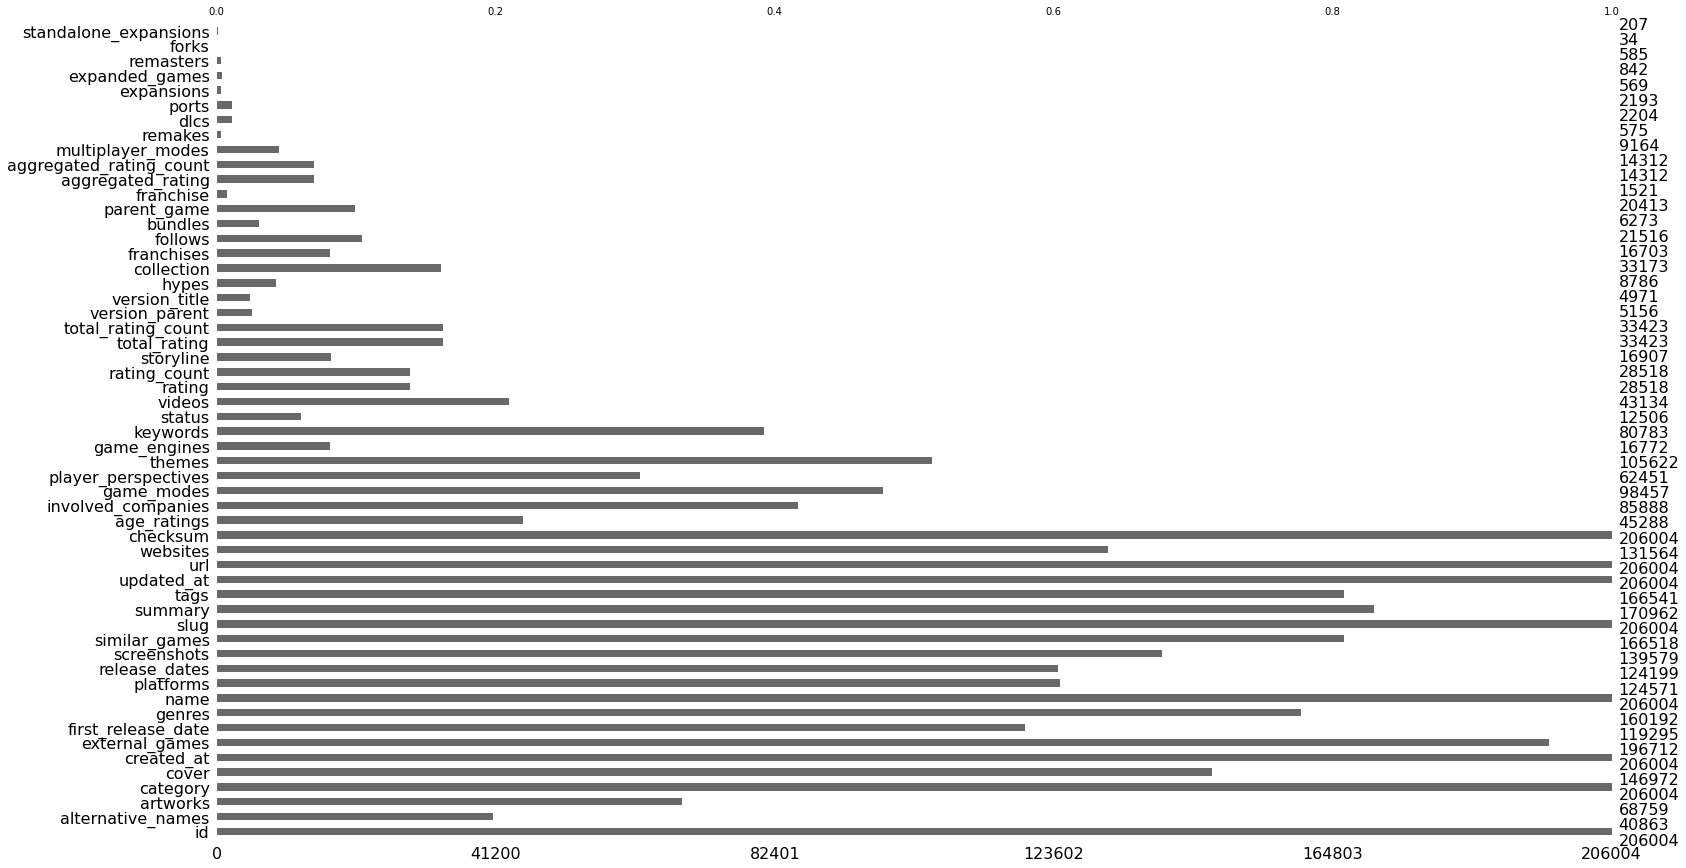

In [3]:
msno.bar(tables['game_library'])
tables['game_library'].shape

In [4]:
game_library, game_ratings, not_rated = prepare.wrangle_data()

Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


In [5]:
game_library.head()

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,...,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
0,148930,2021-03-13,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[win],bok-bok-a-chicken-dating-sim,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,40104,1987-01-01,[shooter],Dogou Souken,[arcade],dogou-souken,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,85031,2014-07-03,[puzzle],City Mysteries,[3ds],city-mysteries,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,99234,2018-05-24,"[adventure, indie]",Sword of the Black Stone,[win],sword-of-the-black-stone,[third-person],[action],0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,50524,2017-07-13,[indie],OtterBash,"[win, mac]",otterbash,[Not available],[action],0,0,...,0,0,0,0,0,0,0,0,0,NaN


(29446, 111)

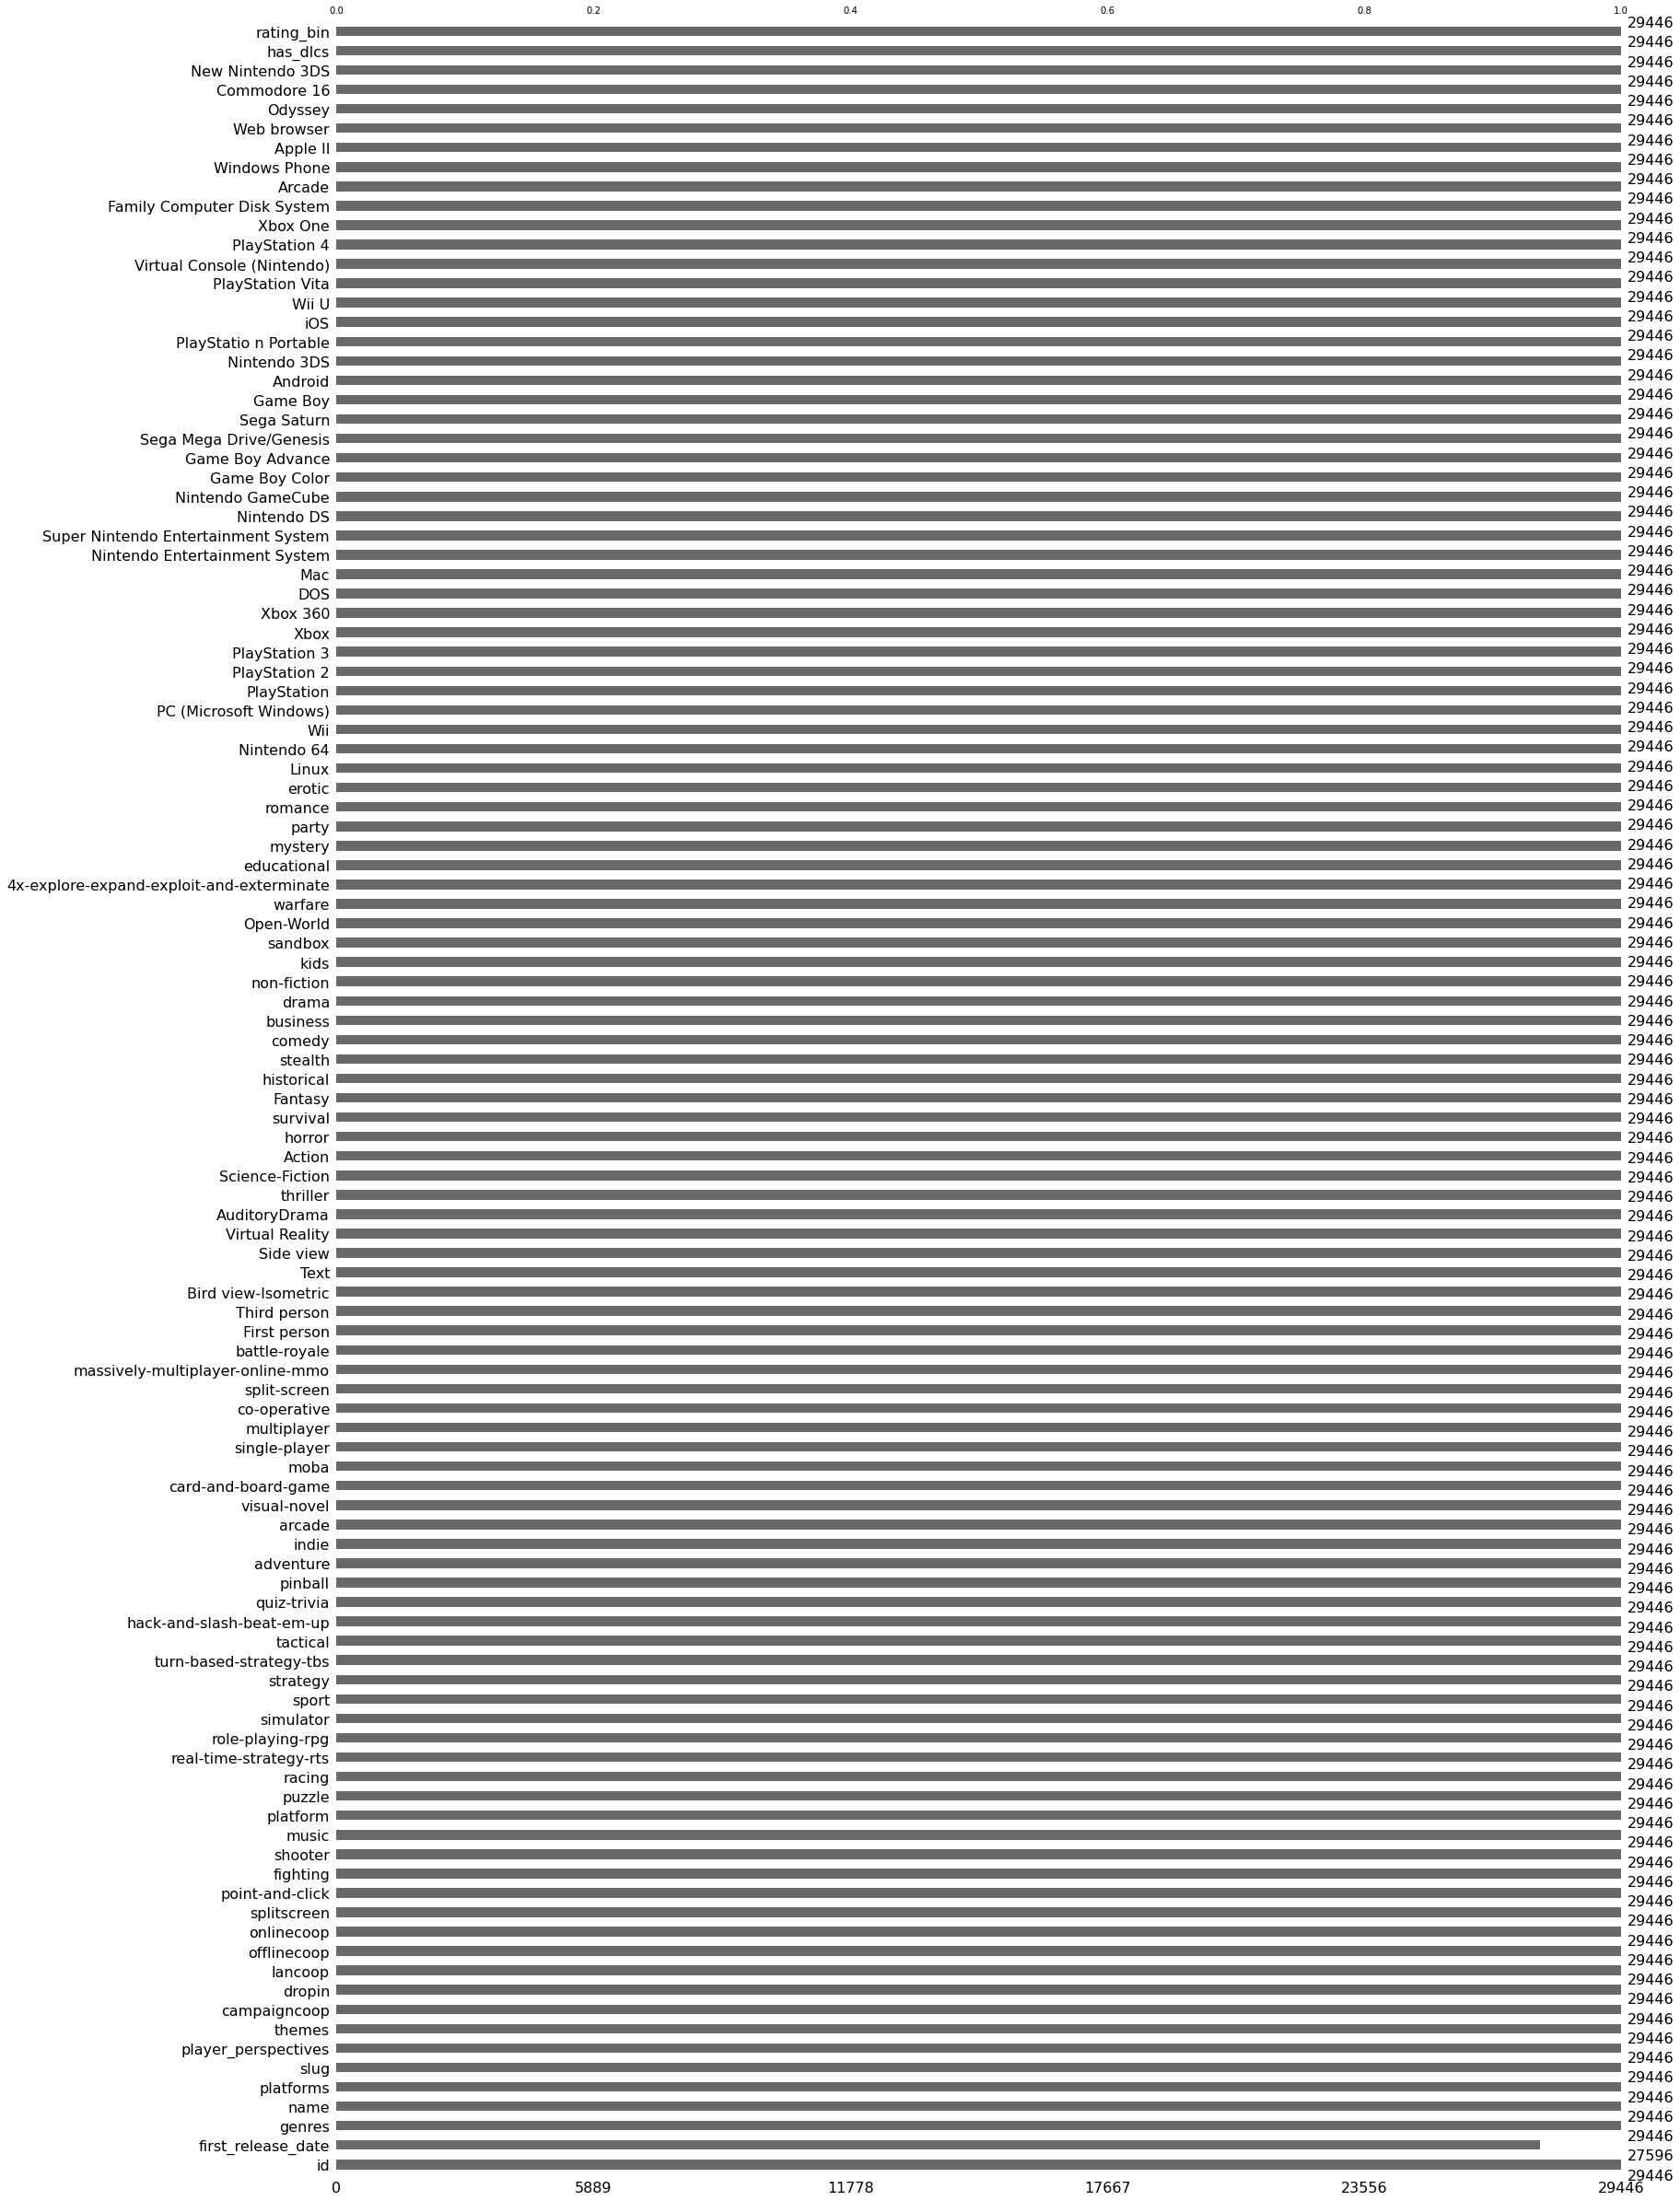

In [6]:
msno.bar(game_ratings)
game_ratings.shape

---

## Splitting the data 

### Why split?
- Splitting the data will prevent overftting when going into modeling
- Train wil be used in exploration

In [11]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.split(game_ratings, stratify_by='rating_bin')


---

# Explore



In [12]:
#this will be seperating the dataframe to only games that are rated superb 
df_subperb_rating = train[train['rating_bin']== 'subperb']


In [13]:
#lets not forget to remove duplicates 
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

In [14]:
# This will be to seperate the dataframe to only games that are rated eaither (bad, very bad, awful)
df_low3_rating = train[(train['rating_bin']== 'bad') | (train['rating_bin']== 'very_bad') | (train['rating_bin']== 'awful')]



In [15]:
# lets remember not to forget to remove the duplicates 
df_low3_rating = df_low3_rating.drop_duplicates(subset = "id")

## Question 1 - Do video games on certain platforms get superb user ratings?

In [16]:
ex.platforms_bar()

#### Yes it looks like the most common superb rated game 
- Platform is PC 
- playstation 4 
- Xbox One 
- Nintendo Switch

### Question 1.1 These are the top 3 platforms for the lowest  ratings (bad, very bad , awful)?


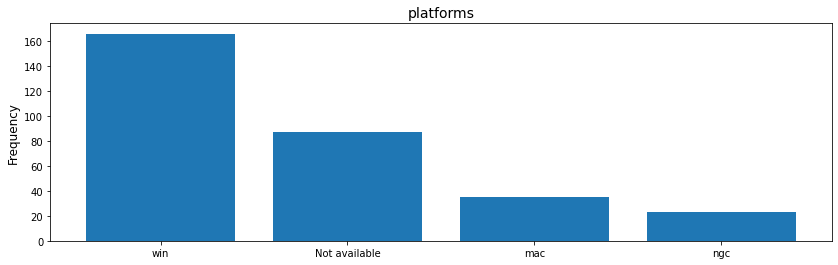

In [17]:
ex.platforms_low(df_low3_rating)

#### Not counting the "Not Avalible" because that is not a platform, 
#### The top 3 platforms are:
- PC
- MAC
- Nintendo Game Cube


## Question 2- What is the most common genre in games that are `subperb` (the highest rating)

In [18]:
ex.genres_bar()

#### the most common platforms in superb rated games are `Indie`, `Adventure`, `Role-Playing-RPG`, `Shooter`

### Question 2.1 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?


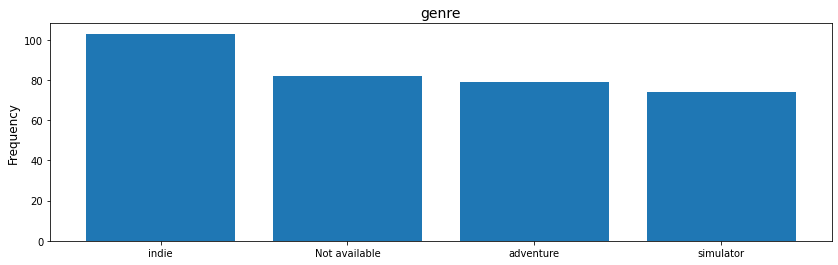

In [19]:
ex.genres_low(df_low3_rating)

#### The most common genres in the lowest rating are `Indie`, `Adventure`, `simulator`

## Question 3- what is the most common theme in games that are subperb (the highest rating)?

In [20]:
ex.theme_bar()

#### The most common themes for games in superb are, `Action` , `Fantasy`, `Science-Fiction`, `Open-World`

### Question 3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

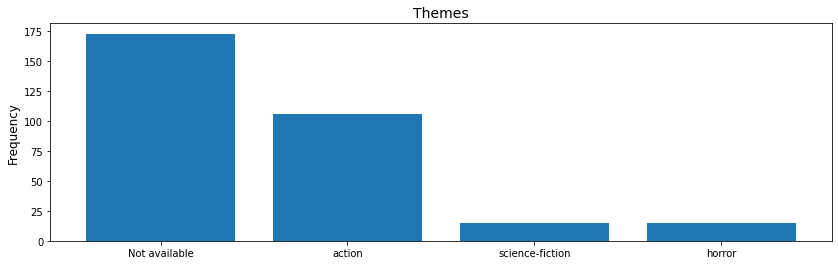

In [21]:
ex.theme_low(df_low3_rating)

#### The most common game these in the lowest ratings `Action`, `Science fiction`, `Fantasy`

## Question 4 What Are the most common player perspectives in superb rated games?

In [22]:
ex.player_bar()

#### The most common player-perspective in superb rated games are `Third-person`,`Birdview-Isometric`, `Side-View`, `First-Person`

## Question 4.1 What Are the most common player perspectives in lowest rated games?

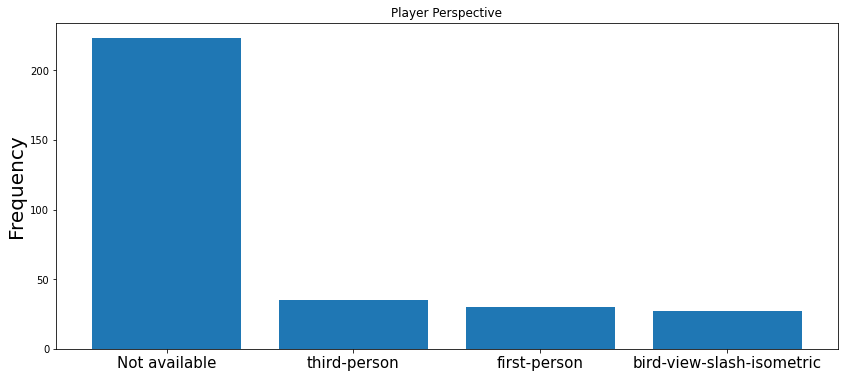

In [23]:
ex.player_low(df_low3_rating)

#### The most common player perspective in the lowest Rated Games are `Third-person`, `First-Person`, `Birdview-Isometric`

## Key Takeaways

The top features are for genre, themes, platforms and player perspective could lead to a successful creation of a profitable and high member rated Video Game


-----

# Modeling  

We built five classification models Random Forest, Decision Tree, K-nearest Neighbor all at various depths and a One vs. Rest classifier and  Logistic Regression model.

In [ ]:
#Drop columns that we do not need for modeling
game_ratings = game_ratings.drop(columns=['name', 'first_release_date', 'slug', 'id', 'genres', 'platforms', 'player_perspectives', 'themes'])
game_ratings.head()

### Random Forest

# Conclusion 

After acquiring, preparing and exploring the data from the IGDB API we were able to build five classification models that were trained on games with member ratings. All models were able to beat the baseline. 
We used the model with the highest accuracy, Random Forest, to predict ratings of games that have not yet been rated on IGDB, based on their features. Having this insight will greatly improve any video games that will be made in the future in regards to having a high user rating.

# Recomendations 

We recommend to stakeholders that some of the best and highest rated video games contain this combination of features:

`Genres` 
- Adventure
- role playing games

`Themes` 
- Fantasy 
- Action

`Platforms` 
- PC 
- Playstation 4

`Top perspectives` 
- Third
- Bird view /Isometric 